In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
columns = list(data.columns)

<Figure size 432x288 with 0 Axes>

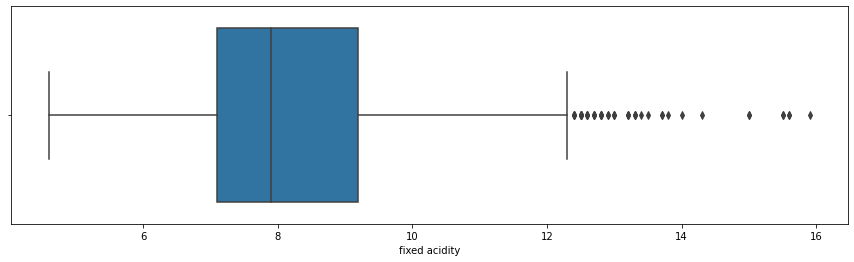

<Figure size 432x288 with 0 Axes>

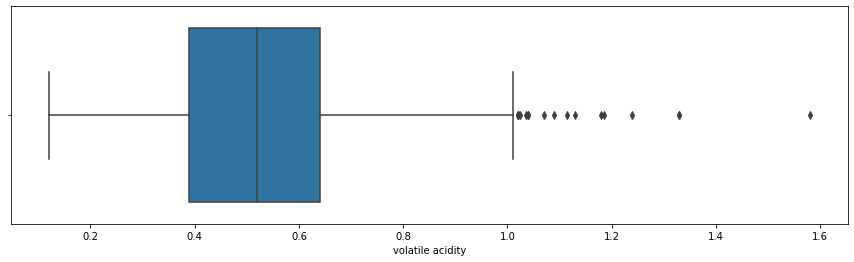

<Figure size 432x288 with 0 Axes>

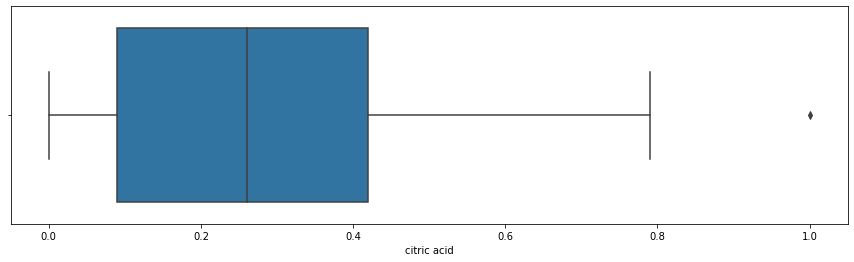

<Figure size 432x288 with 0 Axes>

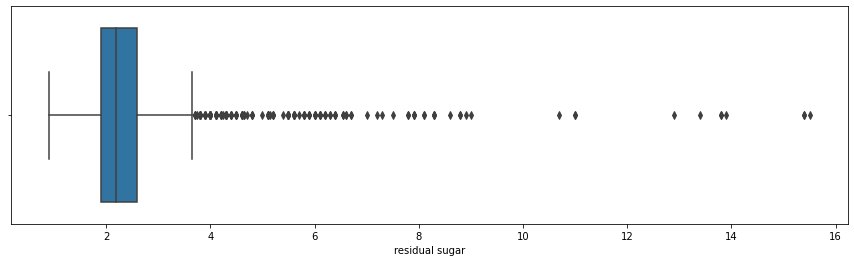

<Figure size 432x288 with 0 Axes>

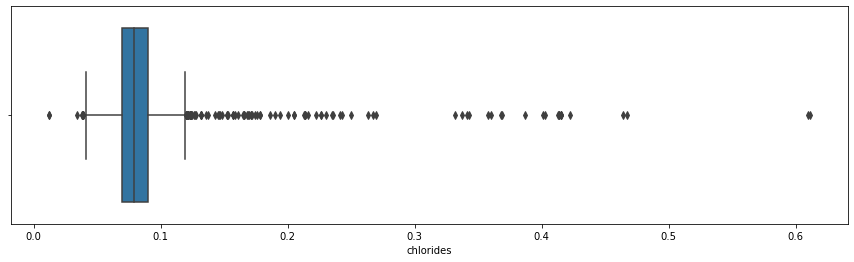

<Figure size 432x288 with 0 Axes>

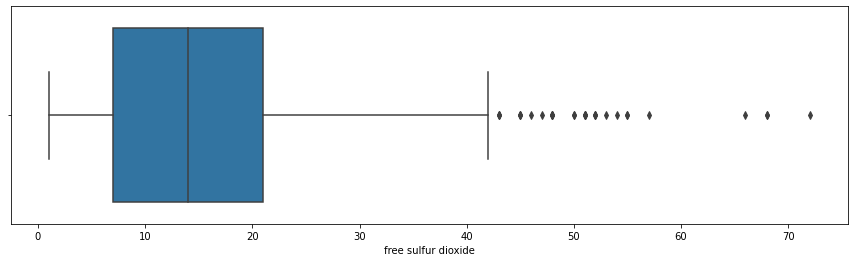

<Figure size 432x288 with 0 Axes>

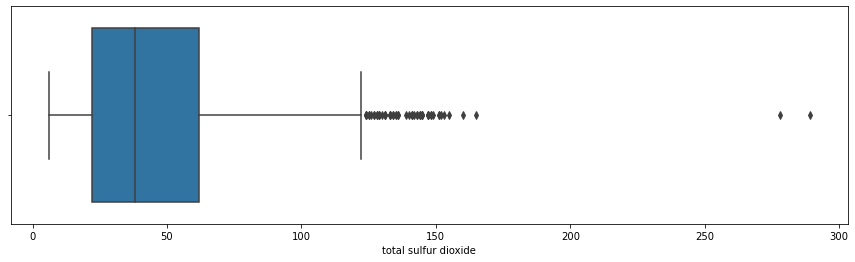

<Figure size 432x288 with 0 Axes>

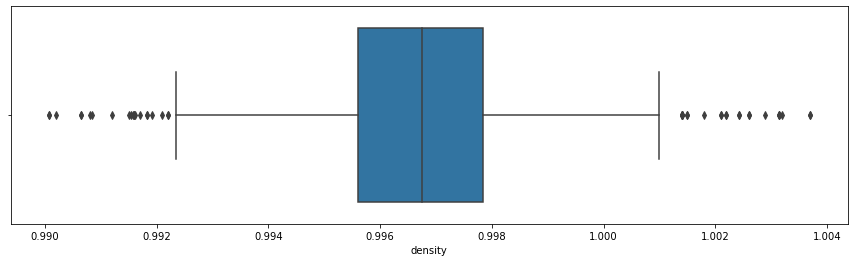

<Figure size 432x288 with 0 Axes>

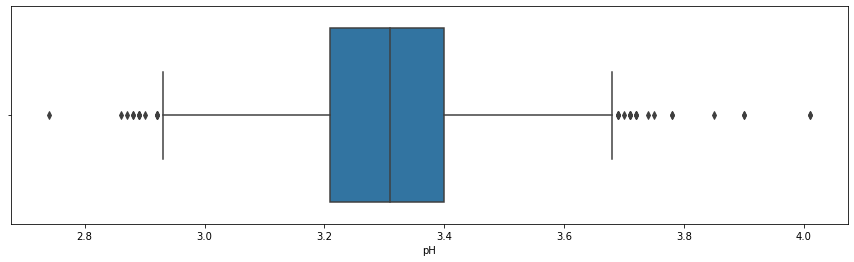

<Figure size 432x288 with 0 Axes>

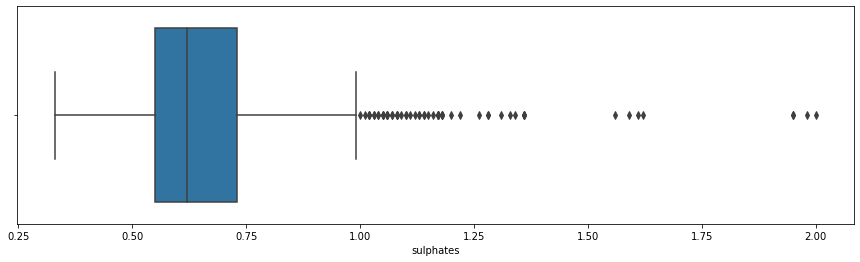

<Figure size 432x288 with 0 Axes>

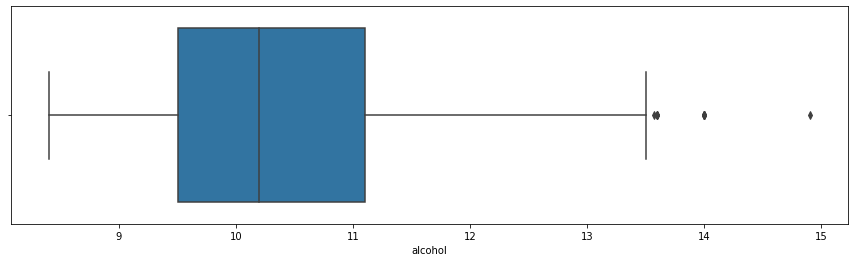

<Figure size 432x288 with 0 Axes>

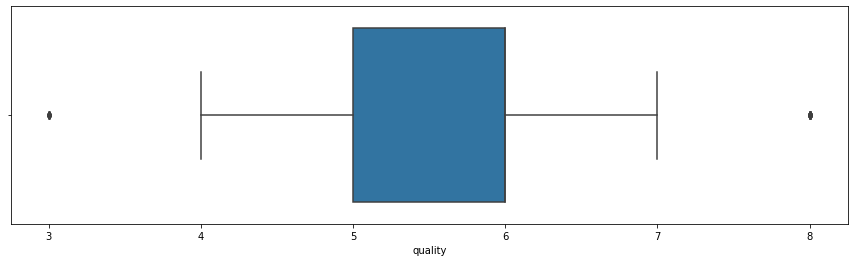

In [5]:
for col in columns:
    plt.figure()
    fig, scatter = plt.subplots(figsize = (15,4))
    sns.boxplot(x=col,data=data)

In [6]:
def outlier_treatment(u):
    q1 = data[u].quantile(0.25)
    q3 = data[u].quantile(0.75)
    iqr = q3-q1 
    low  = q1-1.5*iqr 
    high = q3+1.5*iqr 
    data[u]=np.where(data[u] > high,high,data[u])
    data[u]=np.where(data[u] < low,low,data[u])

<Figure size 432x288 with 0 Axes>

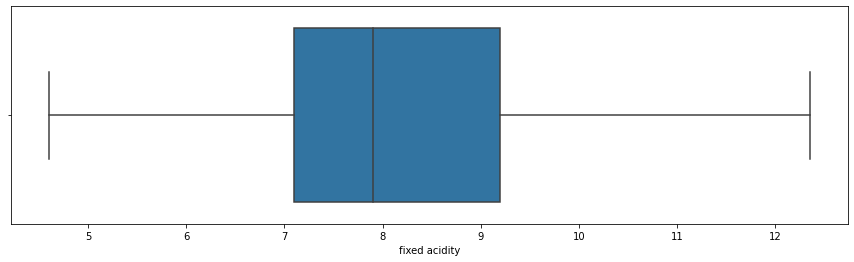

<Figure size 432x288 with 0 Axes>

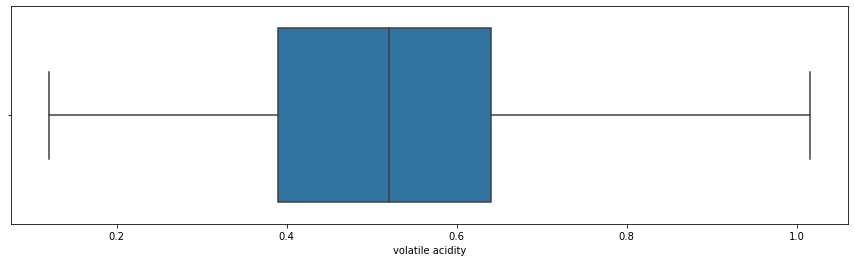

<Figure size 432x288 with 0 Axes>

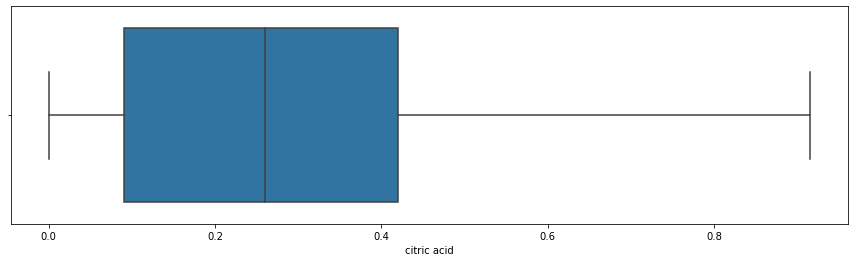

<Figure size 432x288 with 0 Axes>

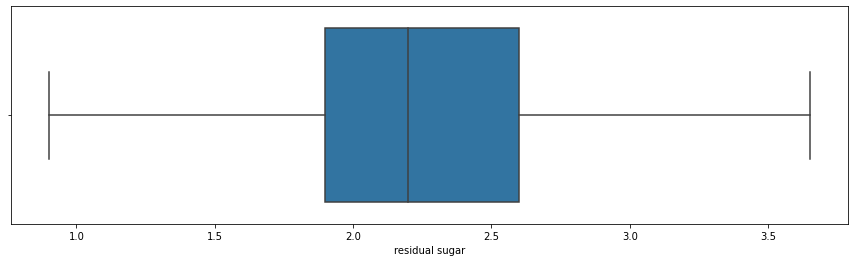

<Figure size 432x288 with 0 Axes>

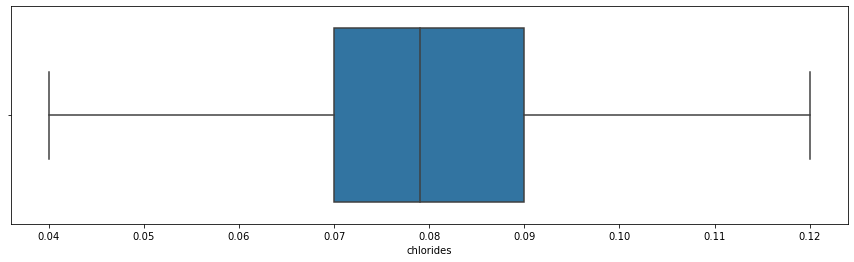

<Figure size 432x288 with 0 Axes>

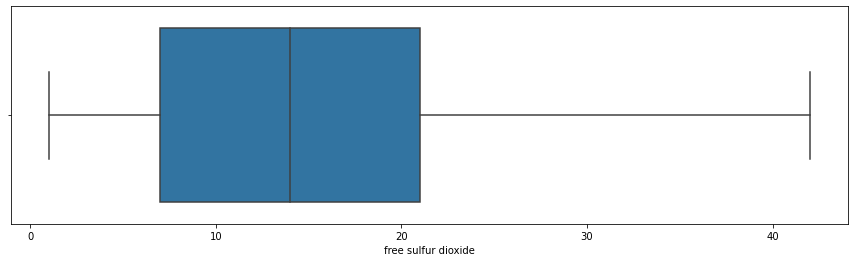

<Figure size 432x288 with 0 Axes>

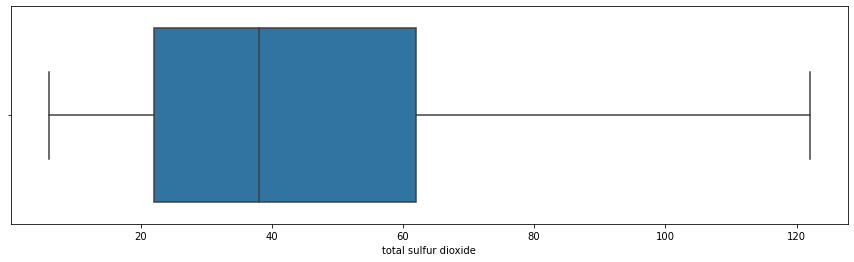

<Figure size 432x288 with 0 Axes>

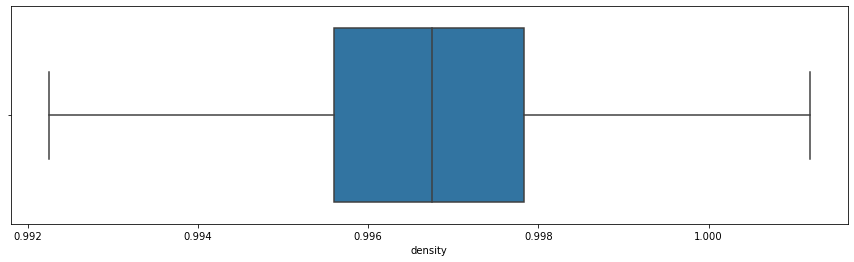

<Figure size 432x288 with 0 Axes>

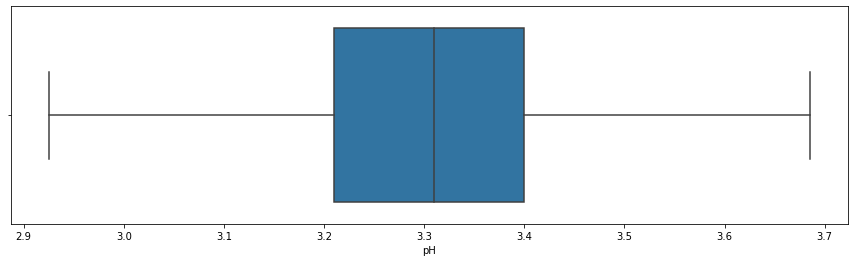

<Figure size 432x288 with 0 Axes>

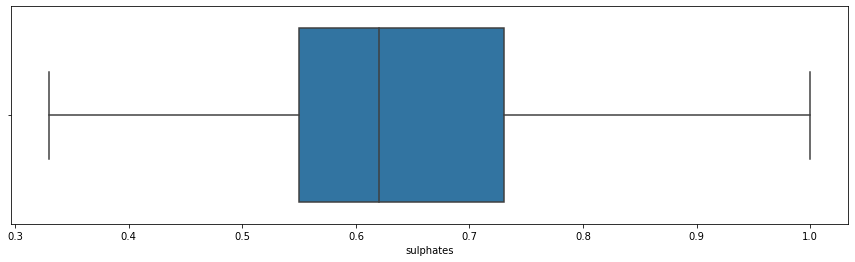

<Figure size 432x288 with 0 Axes>

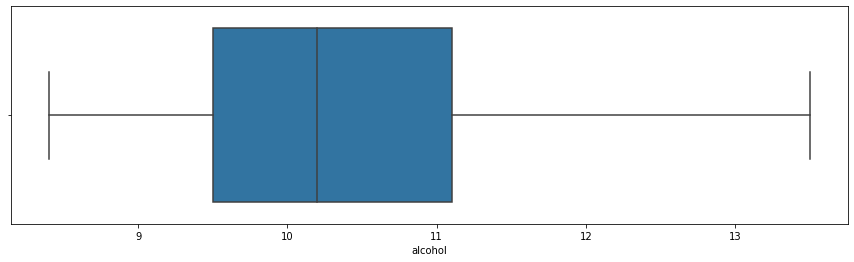

<Figure size 432x288 with 0 Axes>

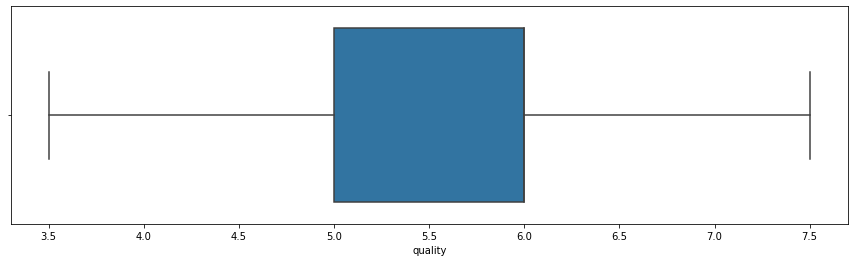

In [7]:
for col in columns:
    plt.figure()
    fig, scatter = plt.subplots(figsize = (15,4))
    outlier_treatment(col)
    sns.boxplot(x=col,data=data)

In [8]:
data['quality']=[1 if x>=7 else 0 for x in data.quality ]

In [9]:
data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop('quality', axis= 1)
y = data['quality']
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 , random_state=25)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
cols =X_train.columns
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [13]:
scaled = scaler.fit_transform(X_train)
scaled = pd.DataFrame(scaled, columns=cols)
scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.438710,0.234637,0.579235,0.530612,0.6375,0.414634,0.637931,0.598714,0.585526,0.701493,0.235294
1,0.374194,0.653631,0.262295,0.244898,1.0000,0.341463,0.491379,0.464485,0.098684,1.000000,0.215686
2,0.335484,0.798883,0.000000,0.326531,1.0000,0.073171,0.043103,0.428691,0.611842,0.283582,0.313725
3,0.322581,0.636872,0.087432,0.367347,0.2875,1.000000,0.396552,0.428691,0.651316,0.402985,0.352941
4,0.451613,0.491620,0.306011,0.204082,1.0000,0.365854,0.431034,0.509228,0.243421,1.000000,0.176471


In [14]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [15]:
logreg = LogReg()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
train_predict = logreg.predict(X_train)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
k = f1_score(train_predict, y_train)
print('Training f1_score', k )

Training f1_score 0.44155844155844154


In [18]:
from sklearn import metrics
cf= metrics.confusion_matrix(y_train,train_predict)
print(cf)

[[939  26]
 [103  51]]


Text(0.5, 257.44, 'Predicted label')

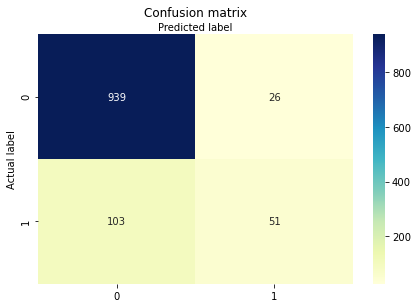

In [19]:
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("Accuracy:",metrics.accuracy_score(y_train,train_predict))
print("Precision:",metrics.precision_score(y_train,train_predict))
print("Recall:",metrics.recall_score(y_train,train_predict))

Accuracy: 0.8847184986595175
Precision: 0.6623376623376623
Recall: 0.33116883116883117


In [21]:
# Test

In [22]:
test_predict = logreg.predict(X_test)
k = f1_score(test_predict, y_test)
print('Test f1_score    ', k )

Test f1_score     0.3368421052631579


In [23]:
from sklearn import metrics
cf= metrics.confusion_matrix(y_test, test_predict)
print(cf)

[[401  16]
 [ 47  16]]


Text(0.5, 257.44, 'Predicted label')

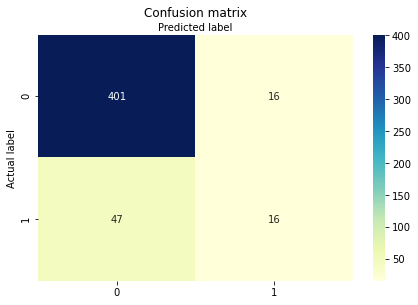

In [24]:
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, test_predict))
print("Precision:",metrics.precision_score(y_test, test_predict))
print("Recall:",metrics.recall_score(y_test, test_predict))

Accuracy: 0.86875
Precision: 0.5
Recall: 0.25396825396825395


In [26]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)

In [28]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.48454051e-01 4.74639081e-02 2.67372690e-03 1.02226017e-03
 3.15674789e-04 3.55750798e-05 1.48531051e-05]


In [29]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3','PC 4','PC 5','PC 6',"PC 7"])

In [30]:
principal_Df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,-12.463736,1.881803,-0.999111,-1.197040,0.101248,-0.198142,0.034898
1,22.858108,-4.191721,-0.192269,-0.530256,-0.345064,-0.328270,0.130869
2,7.915513,2.565183,-0.482126,-0.555923,-0.086649,-0.224823,0.086309
3,14.189571,2.072978,2.944176,-0.342380,0.714021,0.094819,-0.152995
4,-12.463736,1.881803,-0.999111,-1.197040,0.101248,-0.198142,0.034898


In [31]:
final_pcs=["PC 1","PC 2",'PC 3','PC 4','PC 5','PC 6','PC 7']

In [32]:
principal_Df["label"]=data["quality"]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(principal_Df[final_pcs], principal_Df.label, test_size=0.30, random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logisticRegr = LogisticRegression()

In [36]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [37]:
predictions = logisticRegr.predict(x_test)

In [38]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test,predictions))
print("F1 score",metrics.f1_score(y_test,predictions))

accuracy 0.9041666666666667
F1 score 0.43902439024390244


# Conclusion 

## So we have try with different componets of PCA
 When PCA components is 2 the accuracy 0.8958333333333334 ,F1 score 0.0
 When PCA components is 3 the accuracy 0.8958333333333334 ,F1 score 0.0
 When PCA components is 4 the accuracy 0.8833333333333333,F1score0.3488372093023256
 When PCA componet is 5 the accuracy 0.8875 ,F1 score 0.35714285714285715
 When PCA componet is 6 the accuracy 0.8979166666666667 ,F1 score 0.4235294117647058
 When PCA componet is 7 the accuracy 0.9041666666666667 ,F1score 0.43902439024390244
 When PCA componet is 8 the accuracy 0.8979166666666667, F1 score 0.4235294117647058
 When PCA componet is 9 the accuracy 0.8979166666666667, F1 score 0.4235294117647058

# We are gettting Good Accuracy with PCA components 7 it has High accuracy(0.9041666666666667) and F1 Score (0.43902439024390244)  in comparision to Original Logistic Regression